In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.9 MB/s eta 0:00:00


In [2]:
cell_lines = ["SK-HEP-1", 'HepG2', "Huh7", "LSEC", "Hep3B","HepaRG", "LX-2", "LX-1", "Huh1", "HLF",
              "Fa2N-4", "Mahlavu", "Li7", "JHH7", "JHH6", "JHH5", "JHH4", "JHH2", "JHH1", "TFK-1",
              "THLE-3", "THLE-2", "MT-CHC01", "SNU886", "SNU878", "SNU761", "SNU739", "PLC/PRF/5", "SNU182",
              "SNU354", "SNU368", "SNU387", "SNU398", "SNU423", "SNU475", "HCC.1.1", "HCC.2", "HCC.1.2 ", "HCC.3 1" ,
              "HLE", "Huh6", "MHCC97H"]

# PubMed article

In [3]:
from Bio import Entrez

def search_articles(cell_line):
    Entrez.email = "arzumanian.victoria@gmail.com"  # Always provide your email
    query = f"{cell_line}[Title/Abstract]"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

article_counts = {}

for cell_line in cell_lines:
    count = search_articles(cell_line)
    article_counts[cell_line] = count

print(article_counts)

{'SK-HEP-1': 707, 'HepG2': 39647, 'Huh7': 7518, 'LSEC': 652, 'Hep3B': 3323, 'HepaRG': 1102, 'LX-2': 1104, 'LX-1': 158, 'Huh1': 62, 'HLF': 1118, 'Fa2N-4': 22, 'Mahlavu': 112, 'Li7': 148, 'JHH7': 28, 'JHH6': 28, 'JHH5': 12, 'JHH4': 17, 'JHH2': 9, 'JHH1': 13, 'TFK-1': 118, 'THLE-3': 50, 'THLE-2': 109, 'MT-CHC01': 4, 'SNU886': 3, 'SNU878': 2, 'SNU761': 16, 'SNU739': 5, 'PLC/PRF/5': 984, 'SNU182': 46, 'SNU354': 19, 'SNU368': 16, 'SNU387': 72, 'SNU398': 88, 'SNU423': 38, 'SNU475': 52, 'HCC.1.1': 0, 'HCC.2': 286, 'HCC.1.2 ': 0, 'HCC.3 1': 229, 'HLE': 1250, 'Huh6': 231, 'MHCC97H': 641}


In [4]:
import pandas as pd
data=pd.DataFrame.from_dict(article_counts, orient='index')

In [5]:
data = data.rename(columns={0: "Num"})
data = data.reset_index().rename(columns={"index": "Cell line"})

In [6]:
df_sorted = data.sort_values(by="Num", ascending=False)

In [12]:
df_top = df_sorted.head(10)

# Aggregate the rest into a sum, create a DataFrame, and set the "Cell line"
sum_row = df_sorted.tail(len(df_sorted) - 10).sum(numeric_only=True).to_frame().T
sum_row["Cell line"] = "Другие"

# Append the aggregated row to the top DataFrame
df_final = pd.concat([df_top, sum_row], ignore_index=True)

print(df_final)

    Cell line    Num
0       HepG2  39647
1        Huh7   7518
2       Hep3B   3323
3         HLE   1250
4         HLF   1118
5        LX-2   1104
6      HepaRG   1102
7   PLC/PRF/5    984
8    SK-HEP-1    707
9        LSEC    652
10     Другие   2634


In [14]:
c= ['darkblue', 'lightblue', 'peru', 'olivedrab', 'palegoldenrod', '#d3a9b7', 'purple', 'lightslategray', 'brown',
    'lightblue', 'black', 'teal', 'tomato', 'gainsboro', 'firebrick', 'peachpuff', 'darkorange', 'darkgrey', 'darkkhaki', 'gold', 'mediumslateblue',
    'violet', 'darkorchid', 'turquoise', 'lime', 'slategrey', 'rosybrown']

In [ ]:
df_final

<ipython-input-16-4ac9be43bcaf>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df_final['Cell line'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
<ipython-input-16-4ac9be43bcaf>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


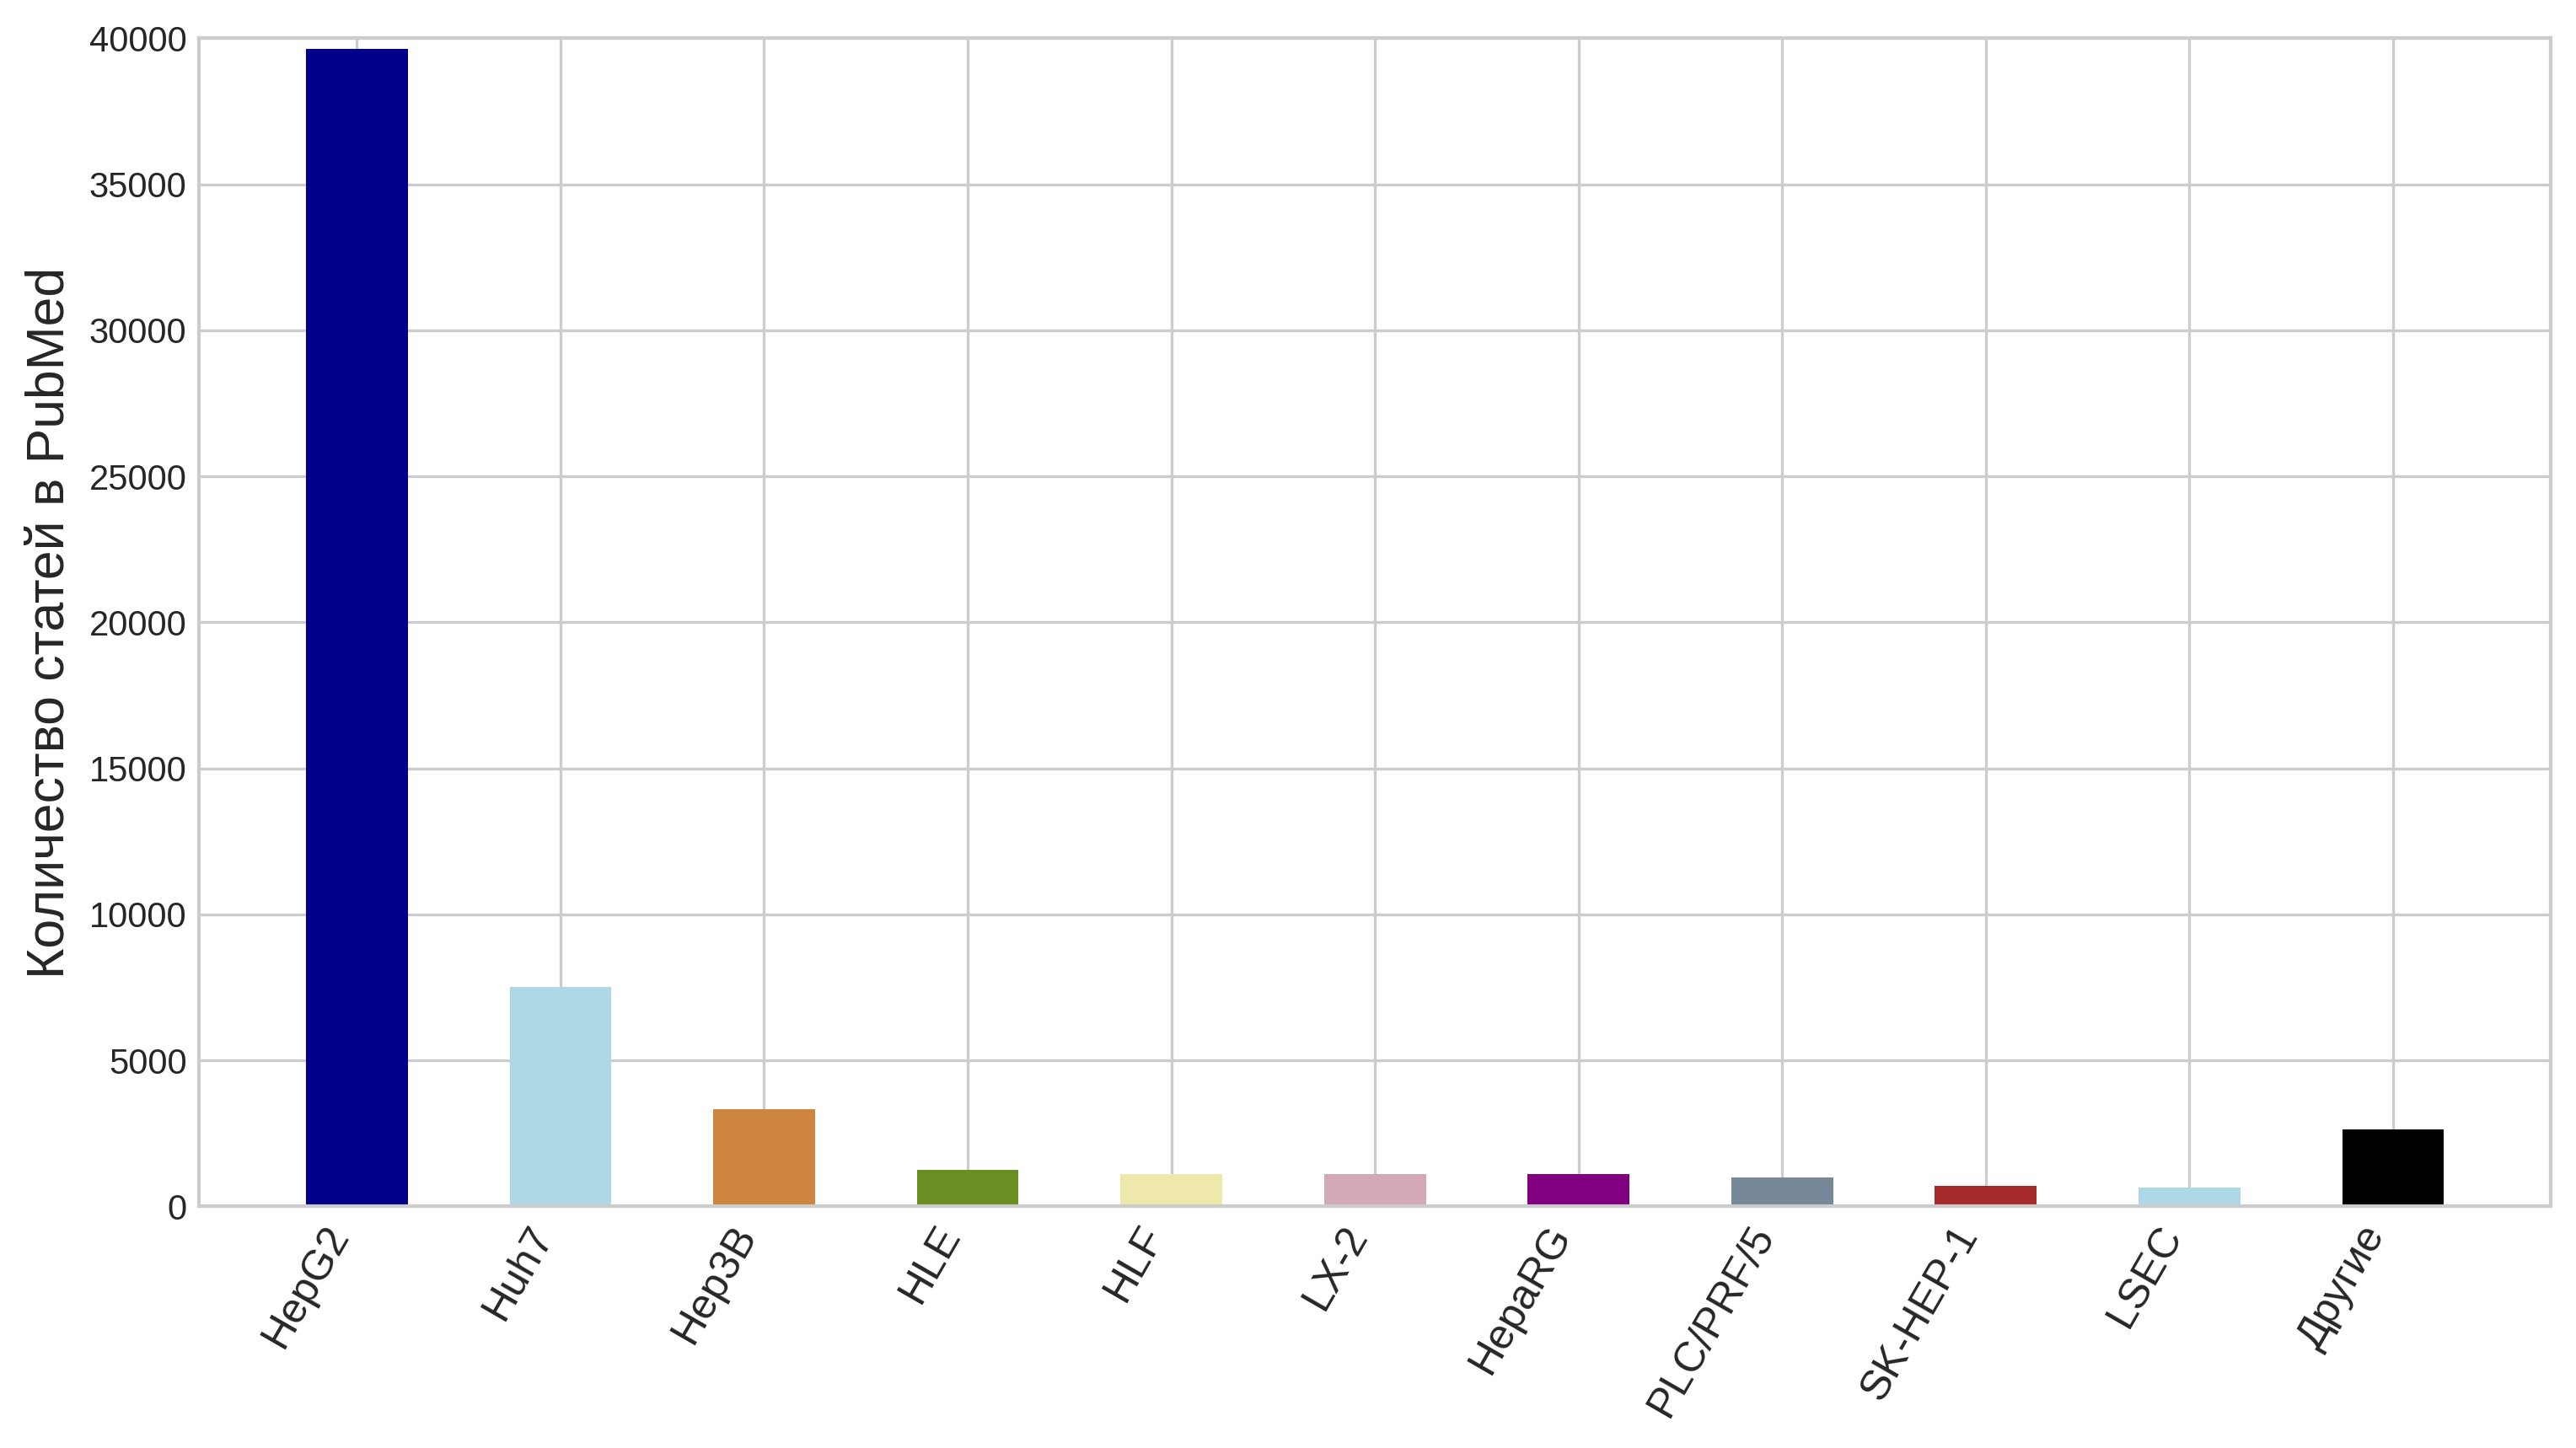

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Plot Bars
plt.figure(figsize=(12,6), dpi= 300)
plt.bar(df_final['Cell line'], df_final['Num'], color=c, width=.5)

# Decoration
plt.gca().set_xticklabels(df_final['Cell line'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
plt.ylabel('Количество статей в PubMed', fontsize=15)
plt.ylim(0, 40000)
plt.style.use('seaborn-whitegrid')
plt.show()
plt.savefig('/content/drive/MyDrive/hist_PubMed.png')